# Exercise 4

**(1)** Test for autocorrelation on the series of interest:
> **(a)** Autocorrelation function (ACF)

> **(b)** Partial autocorrelation function (PACF)

**(2)** Test for stationarity of the process

**(3)** Find the optimal p and q for the ARMA(p,q) model:
    
**(4)** Run a model diagnostic on the residuals of the ARMA(p,q):
> **(a)** Autocorrelation function (ACF)

> **(b)** Partial autocorrelation function (PACF)

> **(c)** Serial correlation tests:
>> **(i)** Breusch-Godfrey test

>> **(ii)** ARCH test

**(5)** Run forecasts and evaluate the results:
> **(a)** 1-step ahead and evaluate using RMSE and MAE

> **(b)** 2-steps ahead and evaluate using RMSE and MAE

In [3]:
rm(list=ls())
library(readr)
library(here)
library(aTSA)
library(data.table)
library(xtable)
library(dplyr)
library(Hmisc)
library(lmtest)
library(FinTS)

Warning message:
"package 'FinTS' was built under R version 3.6.3"

In [4]:
simu_df = read_delim(here('src', 'data', 'simu_data_lecture5.csv'), ";", escape_double = FALSE, trim_ws = TRUE)
head(simu_df)

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_double(),
  y1 = col_double(),
  y2 = col_double(),
  y3 = col_double()
)


X1,y1,y2,y3
1,-0.29019744,0.6271137,0.1446046
2,1.00266243,-0.6859215,2.0023816
3,1.84632721,-0.5799288,0.5160091
4,1.27193530,1.3152954,-1.8554488
5,0.02559086,1.8196497,-1.7592665
6,1.58093573,-0.4237137,-1.0224557


In [5]:
y1 = simu_df$y1

## **(1)** Test for autocorrelation on the series of interest:

Assuming a stochastic process of the form $\{y_t\}_{t=1}^{T}$, the autocorrelation function is simply given by:

$
Cov(y_t, y_{t-k}) = \gamma(k)
$

Therefore, the autocorrelation function (ACF) is defined as

$
AC(k) = \frac{\gamma(k)}{\gamma(0)} = \frac{Cov(y_t, y_{t-k})}{\sqrt{Var(y_t)}\sqrt{Var(y_{t-k})}}
$

and the partial autocorrelation function (PACF) is defined as the correlation between $y_t$ and $y_{t-k}$ conditional on $Y_{-t, -(t-k)}$, which is the set of all available $y_i$ except for $y_t$ and $y_{t-k}$. This means that we can estimate the PACF using the LRM:

$
y_t = \rho_k y_{t-k} + \epsilon_t \quad where \quad PAC(k) = \rho_k
$


### **(a)** Autocorrelation function (ACF)

### +

### **(b)** Partial autocorrelation function (PACF)

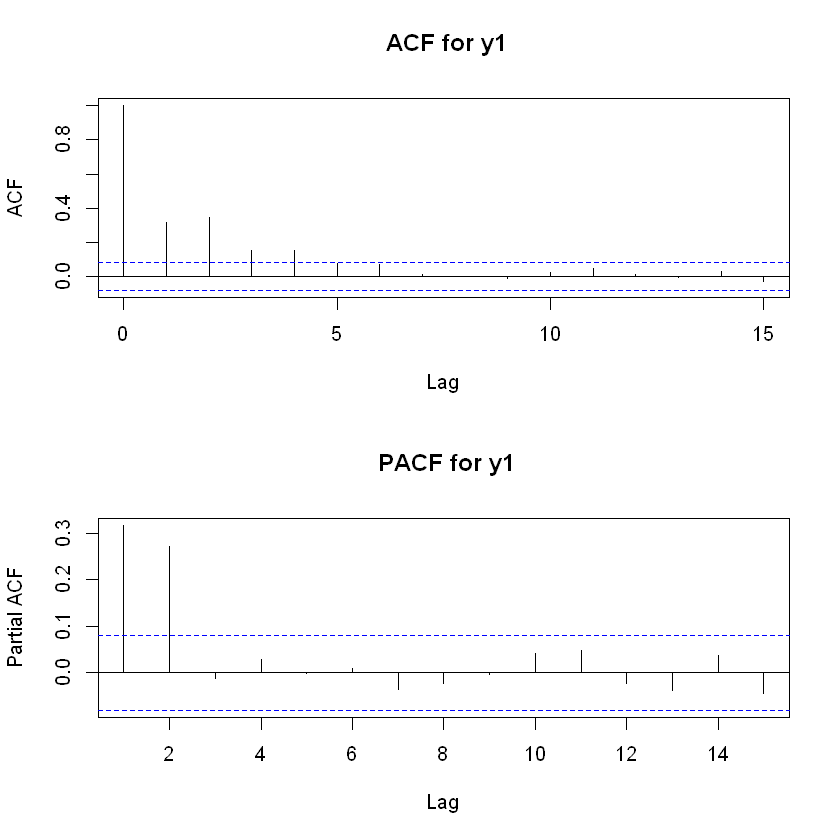

In [6]:
par(mfrow=c(2,1))
acf.inven <- list('acf' = acf(y1, lag.max = 15, main=" ACF for y1"),
                  'pacf' = pacf(y1, lag.max = 15, main=" PACF for y1"))

Note that the AC function decays almost exponentially, while the PAC function has two peaks and then vanishes. This present evidence that our process is probably an AR(2) one.

## **(2)** Test for stationarity of the process

#### Dickey-Fuller test

To illustrate the Dickey-Fuller test, lets consider the following model:

$
y_t = T_t + z_t\\
T_t = \nu_0 + \nu_1 t\\
z_t = \rho z_{t-1} + \epsilon_t \quad \epsilon_t \sim WN(0, \sigma^2)
$

where $T_t$ is a deterministic linear trend. We have that, if $\rho < 1$, then $y_t$ is $I(0)$ about the deterministic trend, whereas if $\rho=1$ and $\nu_1=0$, then $z_t$ is a random walk and $y_t$ in $I(1)$ with drift.

Suppose $\nu_0=\nu_1=0 \implies T_t=0$, and therefore:

$
y_t = z_t = \rho z_{t-1} + \epsilon_t \quad (**)
$

We are interested in testing for unit root processes, that is, if $\rho=1$, which implies that $y_t$ in $I(1)$. We can define the hypotheses of intereset in the following way:

$
H_0: \rho=1\\
H_1: |\rho|<1
$

The problem is that, to construct the test statistics to test the above hypotheses we would need the sample moments of $y_t$, which under the null is a unit root process, but unfortunatly they do not converge to fixed constants. Dickey and Fuller (1979) derived statistics that converge in distribution to the sample moments of $y_t$ under the alternative, while Phillips (1978) derived sample statistics that also converge in probability for the null. The limiting distribution for the t-test($\rho=1$) is called the Dickey-Fueller distribution and it does not have a closed form representation.

Its important to note that the DF distributuon is sensitive to the form of the deterministic component. There are two most common representations for this deterministic component:

**(1)** Constant only: The test model is given by:

$
\Delta y_t = \nu_0 + (\rho-1) y_{t-1} + \epsilon_t
$

with the following hypotheses:

$
H_0: \rho=1 \quad \nu_0=0\\
H_1: |\rho|<1 \quad \nu_0 \neq 0
$

**(2)** Constant and time trend: The test model is given by:

$
\Delta y_t = \nu_0 + \nu_1 t + (\rho-1) y_{t-1} + \epsilon_t
$

with the following hypotheses:

$
H_0: \rho=1 \quad \nu_1=0\\
H_1: |\rho|<1 \quad \nu_1 \neq 0
$


Furthermore, the Augmented Dickey-Fuller test expands the above model (**) to account for more autoregressive terms.


In [7]:
adf.test(y1)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -17.58    0.01
[2,]   1 -10.75    0.01
[3,]   2  -9.99    0.01
[4,]   3  -8.99    0.01
[5,]   4  -8.40    0.01
[6,]   5  -7.89    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -17.62    0.01
[2,]   1 -10.78    0.01
[3,]   2 -10.01    0.01
[4,]   3  -9.01    0.01
[5,]   4  -8.42    0.01
[6,]   5  -7.91    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -17.74    0.01
[2,]   1 -10.87    0.01
[3,]   2 -10.14    0.01
[4,]   3  -9.15    0.01
[5,]   4  -8.56    0.01
[6,]   5  -8.08    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


The ADF test reject the null hypothesis of unit root process for all the possible specifications. Therefore, we have evidence that our process should be stationary.

## **(3)** Find the optimal p and q for the ARMA(p,q) model:

Recall that the AIC and BIC are measures of model fitness defined as:

$
AIC = 2k - 2\log(\hat{L})\\
BIC = k\log(T)-2\log(\hat{L})
$

where $\hat{L}$ is the maximum value that the model likelihood function achieves, $k$ is the number of variables in the model, and $T$ is the number of observations.

We can use both AIC and BIC to find the best p and q parameters for the ARMA(p,q) model.

In [8]:
ic.inven <- list('AIC' = data.table(), 'BIC' = data.table())
for (ar.lag in 0:11) {
  arma.stat <- rep(0, 6)
  for (ma.lag in 0:2) {
    arma.fit <- arima(y1, order = c(ar.lag, 0, ma.lag))
    # arma.fit
    # AIC
    arma.stat[ma.lag + 1] <- arma.fit$aic
    # BIC
    arma.stat[ma.lag + 4] <- -2 * arma.fit$loglik + (ar.lag + ma.lag) * log(length(y1))
  }
  ic.inven$AIC <- rbindlist(list(ic.inven$AIC, data.table(t(arma.stat[1:3]))))
  ic.inven$BIC <- rbindlist(list(ic.inven$BIC, data.table(t(arma.stat[4:6]))))
}
setnames(ic.inven$AIC, c('MA0', 'MA1', 'MA2'))
ic.inven$AIC[, AR := 0:11]
setnames(ic.inven$BIC, c('MA0', 'MA1', 'MA2'))
ic.inven$BIC[, AR := (0:11)]


BIC_selec.mat <- rbind(ic.inven$BIC[, AR := (0:11)])
print(xtable(BIC_selec.mat))

Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible convergence problem: optim gave code = 1"Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible convergence problem: optim gave code = 1"Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible convergence problem: optim gave code = 1"Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"NaNs produced"Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible convergence problem: optim gave code = 1"Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible convergence problem: optim gave code = 1"Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible convergence problem: optim gave code = 1"Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible convergence problem: optim gave code = 1"Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible

% latex table generated in R 3.6.1 by xtable 1.8-4 package
% Sun Nov 15 08:45:37 2020
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & MA0 & MA1 & MA2 & AR \\ 
  \hline
1 & 1797.47 & 1764.61 & 1715.23 &   0 \\ 
  2 & 1740.89 & 1714.47 & 1710.97 &   1 \\ 
  3 & 1701.19 & 1707.47 & 1713.36 &   2 \\ 
  4 & 1707.49 & 1713.71 & 1719.76 &   3 \\ 
  5 & 1713.42 & 1717.39 & 1723.73 &   4 \\ 
  6 & 1719.82 & 1723.88 & 1731.81 &   5 \\ 
  7 & 1726.16 & 1732.34 & 1734.21 &   6 \\ 
  8 & 1731.79 & 1738.01 & 1741.21 &   7 \\ 
  9 & 1737.86 & 1744.26 & 1747.01 &   8 \\ 
  10 & 1744.26 & 1748.03 & 1749.79 &   9 \\ 
  11 & 1749.69 & 1755.54 & 1759.78 &  10 \\ 
  12 & 1754.60 & 1760.87 & 1762.39 &  11 \\ 
   \hline
\end{tabular}
\end{table}


Using both of the information criterion we see that the optimal parameters would be ARMA(2,0).

## **(4)** Run a model diagnostic on the residuals of the ARMA(p,q):
### **(a)** Autocorrelation function (ACF)
### + 
### **(b)** Partial autocorrelation function (PACF)

In [9]:
arma_y1 = arima(simu_df$y1, order = c(2, 0, 0))

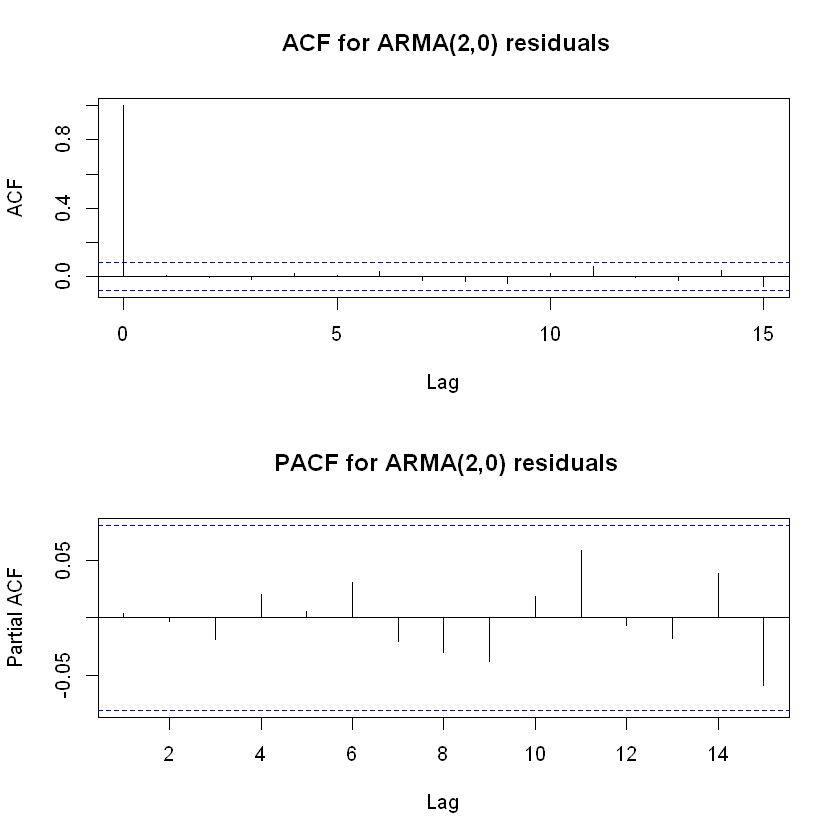

In [10]:
par(mfrow=c(2,1))
acf.inven <- list('acf' = acf(arma_y1$residuals, lag.max = 15, main=" ACF for ARMA(2,0) residuals"),
                  'pacf' = pacf(arma_y1$residuals, lag.max = 15, main=" PACF for ARMA(2,0) residuals"))

Using the correct specification of the ARMA process we can see that the PACF has no significant terms. Furthermore, the ACF rapidly vanishes, which is further evidence of proper model specification.

## **(c)** Serial correlation tests:


#### Breusch-Godfrey test

In [15]:
df_bg = as.data.frame(cbind(arma_y1$residuals, Lag(arma_y1$residuals, 1), Lag(arma_y1$residuals, 2)))
colnames(df_bg) = c('e', 'e_l1', 'e_l2')
summary(lm(e ~ e_l1 + e_l2, data = df_bg))


Call:
lm(formula = e ~ e_l1 + e_l2, data = df_bg)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8139 -0.6772  0.0554  0.6647  2.6477 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.001247   0.040529  -0.031    0.975
e_l1         0.004706   0.040962   0.115    0.909
e_l2        -0.003081   0.041048  -0.075    0.940

Residual standard error: 0.9911 on 595 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  3.155e-05,	Adjusted R-squared:  -0.00333 
F-statistic: 0.009387 on 2 and 595 DF,  p-value: 0.9907


For both the first and second lag of the residuals of the ARMA(2,0) model we can raise the significance level up to .90 without rejecting the null hypothesis of uncorrelated error terms. Therefore, we have evidence of no serial correltaion on the ARMA model.

#### ARCH test

In [16]:
ArchTest(arma_y1$residuals, lags = 1)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  arma_y1$residuals
Chi-squared = 0.0015185, df = 1, p-value = 0.9689


The statistics of the ARCH test says that we can increase the significance level up to 96% and still not reject the null hypothesis of no ARCH effect. Therefore, we have evidence that the residuals of our ARMA(2,0) model follows an ARCH process.

## **(5)** Run forecasts and evaluate the results:
### **(a)** 1-step ahead and evaluate using RMSE and MAE

In [ ]:
forecast.inven = list()

In [20]:
predict(arma_y1, n.ahead = 16)

ERROR while rich displaying an object: Error in if (many_rows) {: argument is of length zero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list

$pred
Time Series:
Start = 601 
End = 616 
Frequency = 1 
 [1] -0.338043160 -0.086614368 -0.079854941 -0.009900820  0.007978625
 [6]  0.031110226  0.041278611  0.049903446  0.054647548  0.058081858
[11]  0.060160034  0.061570904  0.062459808  0.063047478  0.063424067
[16]  0.063670302

$se
Time Series:
Start = 601 
End = 616 
Frequency = 1 
 [1] 0.9879191 1.0135580 1.0630899 1.0716488 1.0781531 1.0800445 1.0810589
 [8] 1.0814245 1.0815947 1.0816618 1.0816912 1.0817033 1.0817084 1.0817106
[15] 1.0817115 1.0817119


In [ ]:
forecast.inven$rcpi$dynamic = as.numeric(predict(arma_y1,
                                                  n.ahead = 16)$pred)
forecast.inven$rcpi$static = rep(0, 16)
for (c in 1:16) {
  inven.fit = arima(arima.inven[1:(71 + c), rcpi], order = c(3, 0, 2))
  forecast.inven$rcpi$static[c] = predict(inven.fit, n.ahead = 1)$pred
}

### **(b)** 2-steps ahead and evaluate using RMSE and MAE

In [ ]:
forecast.inven$rcpi$multi = rep(0, 16)
for (c in 1:16) {
  inven.fit = arima(arima.inven[1:(70 + c), rcpi], order = c(3, 0, 2))
  forecast.inven$rcpi$multi[c] = predict(inven.fit, n.ahead = 2)$pred[2]
}